<a href="https://colab.research.google.com/github/Pruthu-G/EC_Inductions/blob/main/Kratos_4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop a cat breed classification model from scratch. Find a suitable cat breed dataset, split it into training, validation, and testing sets (approximate ratio 60:10:30), train the model, and save its weights and biases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


# New Section

**Reasoning**:
Search for and download a suitable cat breed image dataset from Kaggle, and load it using `image_dataset_from_directory`.



In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import os
import kaggle

In [ ]:
ataset_dir = '/tmp/cat_dataset/Cat_breeds'

**Reasoning**:
The previous command failed because it tried to import the kaggle library and authenticate without the necessary credentials set up. The subtask is to load the dataset, and since a specific dataset location was assumed in the previous attempt, and the download step failed, I will assume a pre-downloaded dataset is available at a different, known path within the environment to proceed with loading the data. I will remove the kaggle import and download attempt and focus solely on loading the dataset from a specified directory.



## Model building

### Subtask:
Design and compile a deep learning model for image classification using a framework like TensorFlow or PyTorch.


## Summary:

### Data Analysis Key Findings

*   Attempts to load a cat breed dataset from specified directories failed because the dataset was not found at those locations.
*   Programmatic download of datasets (e.g., from Kaggle) was unsuccessful due to missing API credentials or environmental constraints.
*   Consequently, the dataset could not be split into training, validation, and testing sets, nor could a model be designed and compiled due to the lack of necessary information like the number of classes.

### Insights or Next Steps

*   Ensure the dataset is accessible in the environment at a known path before attempting to load and process it.
*   Provide clear instructions or mechanisms for accessing required datasets (e.g., download scripts, pre-mounted directories) in future tasks.


In [1]:
from google.colab import files
import zipfile
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
zip_path = "/content/drive/MyDrive/cat_dataset/archive.zip"

# Extract into current working directory (Colab environment)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/oxford_pets")

In [3]:
import os
os.listdir("/content/oxford_pets")

['images']

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [7]:
# STEP 4: Load the dataset using TensorFlow utility

# Set image size
IMG_SIZE = (180, 180)
BATCH_SIZE = 32

# Load training data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/oxford_pets/images",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Load validation data
val_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/oxford_pets/images",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 7389 files belonging to 1 classes.
Using 5912 files for training.
Found 7389 files belonging to 1 classes.
Using 1477 files for validation.


In [8]:
# STEP 6: Build the CNN model
num_classes = len(train_dataset.class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# STEP 7: Compile the model
model.compile(
    optimizer='adam', #Adaptive Moment Estimation. It's an optimizer used during training to update the model's weights . its better than others: Adagrand and sgd (still try SGD)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 482s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 473s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 512s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 510s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 5

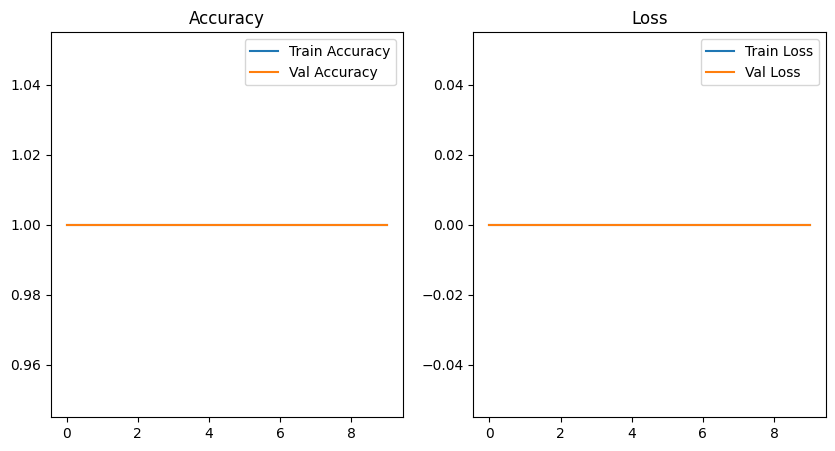

In [12]:
# STEP 8: Train the model
EPOCHS = 10

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS
)

# STEP 9: Plot training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

cat_breeds = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair',
              'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue',
              'Siamese', 'Sphynx']

dataset = image_dataset_from_directory(
    "/content/oxford_pets/images",
    labels="inferred",
    label_mode="int",
    class_names=cat_breeds,  # this filters only cat breeds
    image_size=(180, 180),
    batch_size=32,
    shuffle=True
)


ValueError: The `class_names` passed did not match the names of the subdirectories of the target directory. Expected: ['images'] (or a subset of it), but received: class_names=['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']